# EDA
Exploración de los datos del dataset de "Credit card fraud detection"

In [1]:
import pandas as pd
import numpy as np
import os, sys, warnings
from tqdm import tqdm

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
# pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 200

In [3]:
data = pd.read_csv("../datasets/creditcard.csv.gz")
## example data
print(f"{data.shape=}")
data.head()

data.shape=(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
target = "Class"
X_cols = [c for c in data if c.startswith('V')]
print(f"Target: {target}")
print(f"Feature: {','.join(X_cols)}")

Target: Class
Feature: V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28


### EDA

- 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
- 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning
- 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwis

In [5]:
## check nulls
null_values = data.isnull().sum().sum()
print(f"there's {null_values=}")

there's null_values=0


In [6]:
## Anomalous MAsk
mask = data[target]==1
mask.value_counts()

False    284315
True        492
Name: Class, dtype: int64

In [7]:
## decribe dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
## Normal
data[~mask].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,94838.202258,47484.015786,0.000000,54230.000000,84711.000000,139333.000000,172792.000000
V1,284315.0,0.008258,1.929814,-56.407510,-0.917544,0.020023,1.316218,2.454930
V2,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
V3,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
V4,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
V5,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
V6,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
V7,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
V8,284315.0,-0.000987,1.161283,-73.216718,-0.208633,0.022041,0.326200,18.709255
V9,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.598230,15.594995


In [9]:
## Anomalous
data[mask].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


#### Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Este es un dataset desbalanceado 
t = pd.concat([data[target].value_counts(), data[target].value_counts(normalize=True)*100], axis=1)
t.columns = ["Freq","%Freq"]
t.rename(index={0:"Normal", 1:"Abnormal"})

,Freq,%Freq
Normal,284315,99.827251
Abnormal,492,0.172749


~~~python
sns.pairplot(data=data)
~~~
![pairplot_credit_card](./pairplot_vars.png)

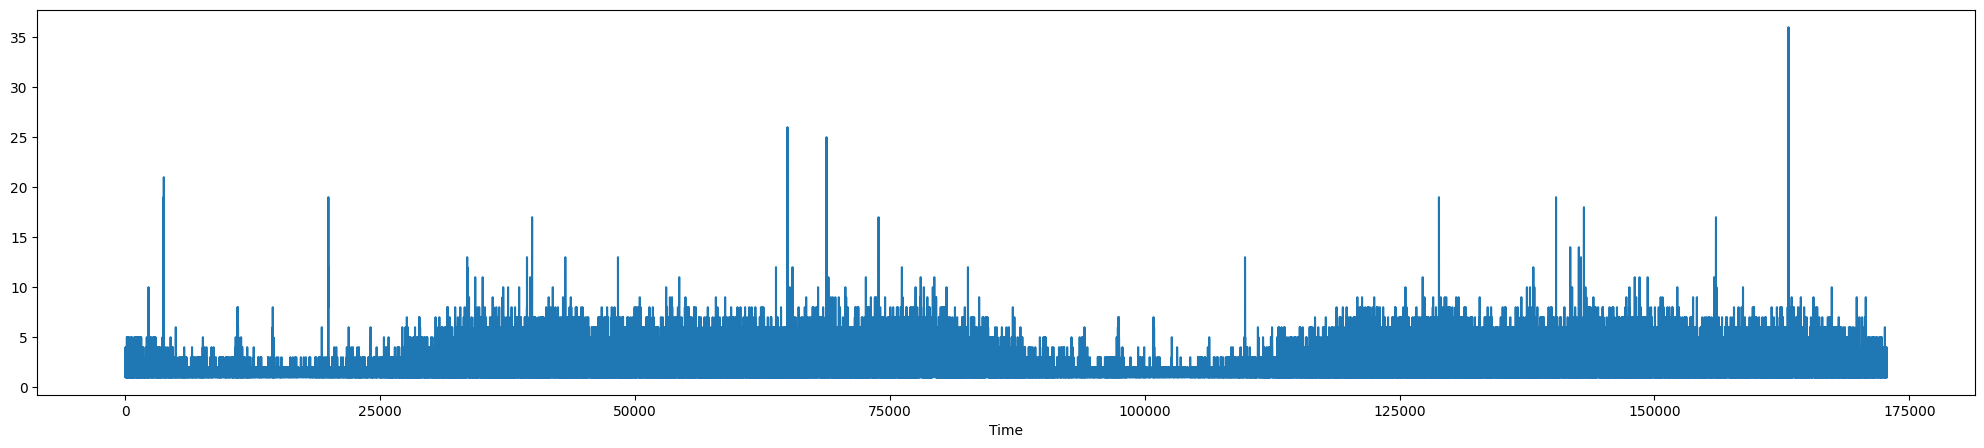

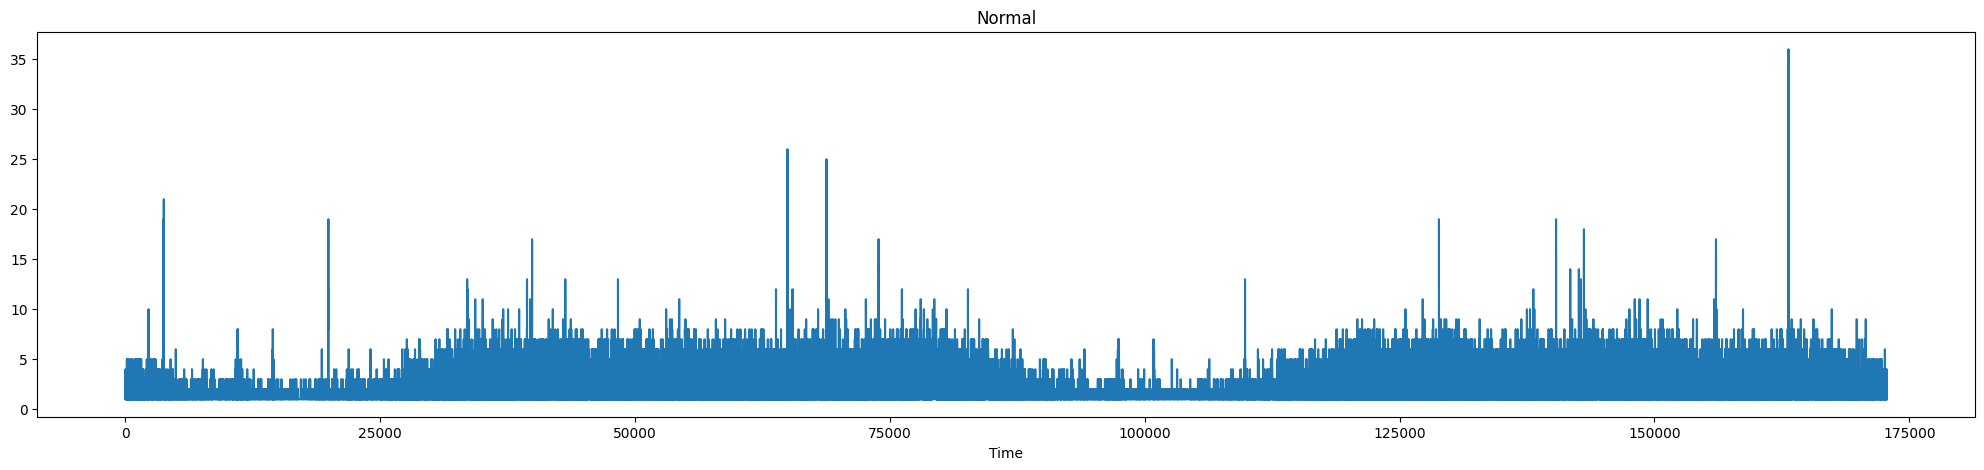

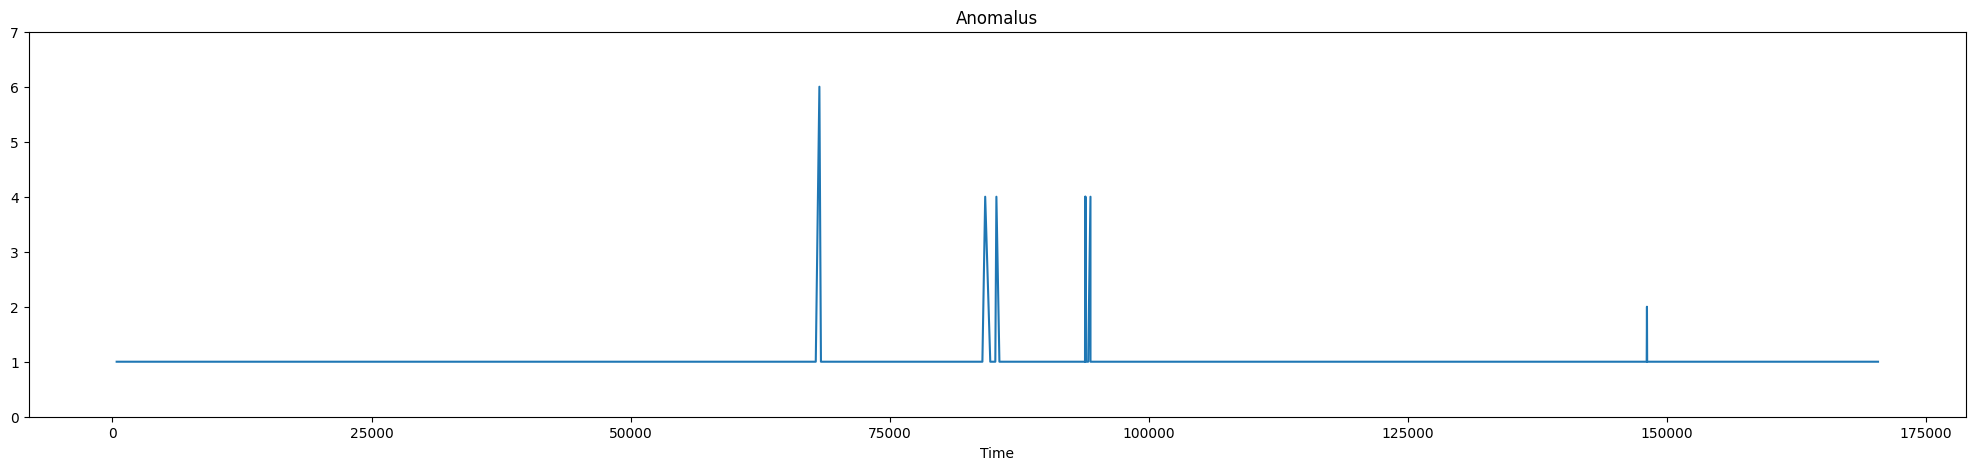

In [12]:
## number of records
data.groupby("Time")["Class"].size().plot(figsize=(25,5))
plt.show()
data[~mask].groupby("Time")["Class"].size().plot(figsize=(25,5), title="Normal")
plt.show()
data[mask].groupby("Time")["Class"].size().plot(figsize=(25,5), title="Anomalus", ylim=(0,7))
plt.show()

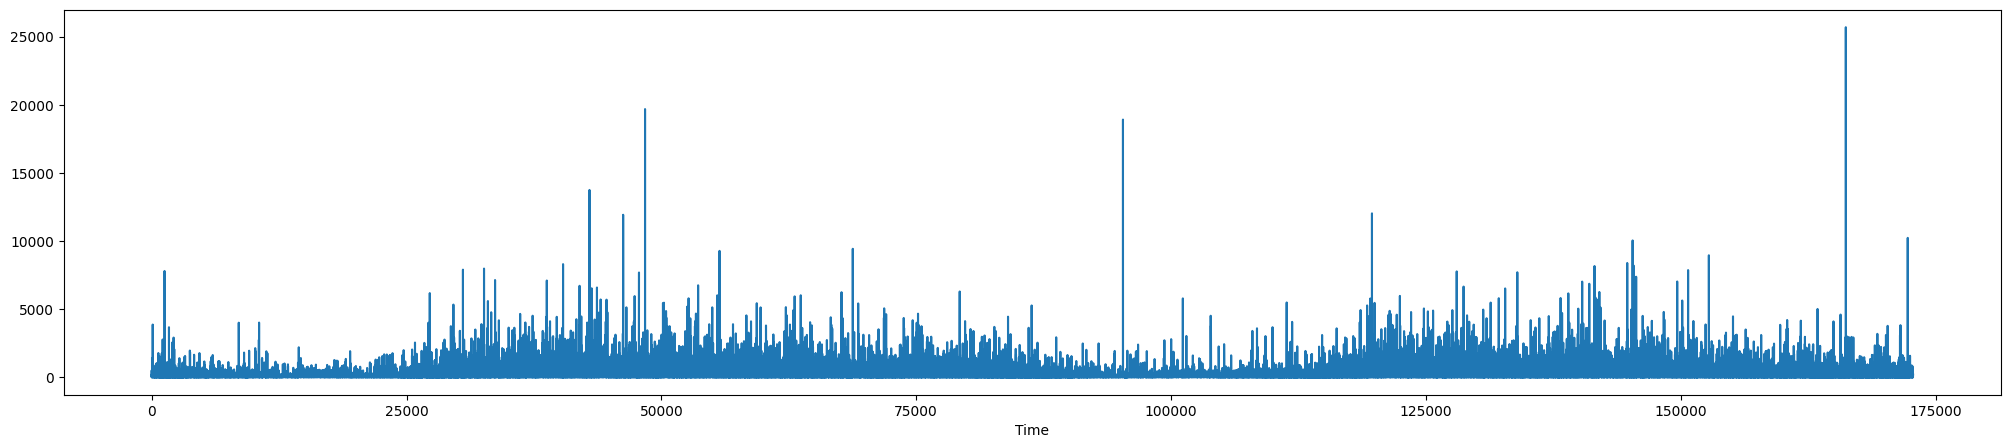

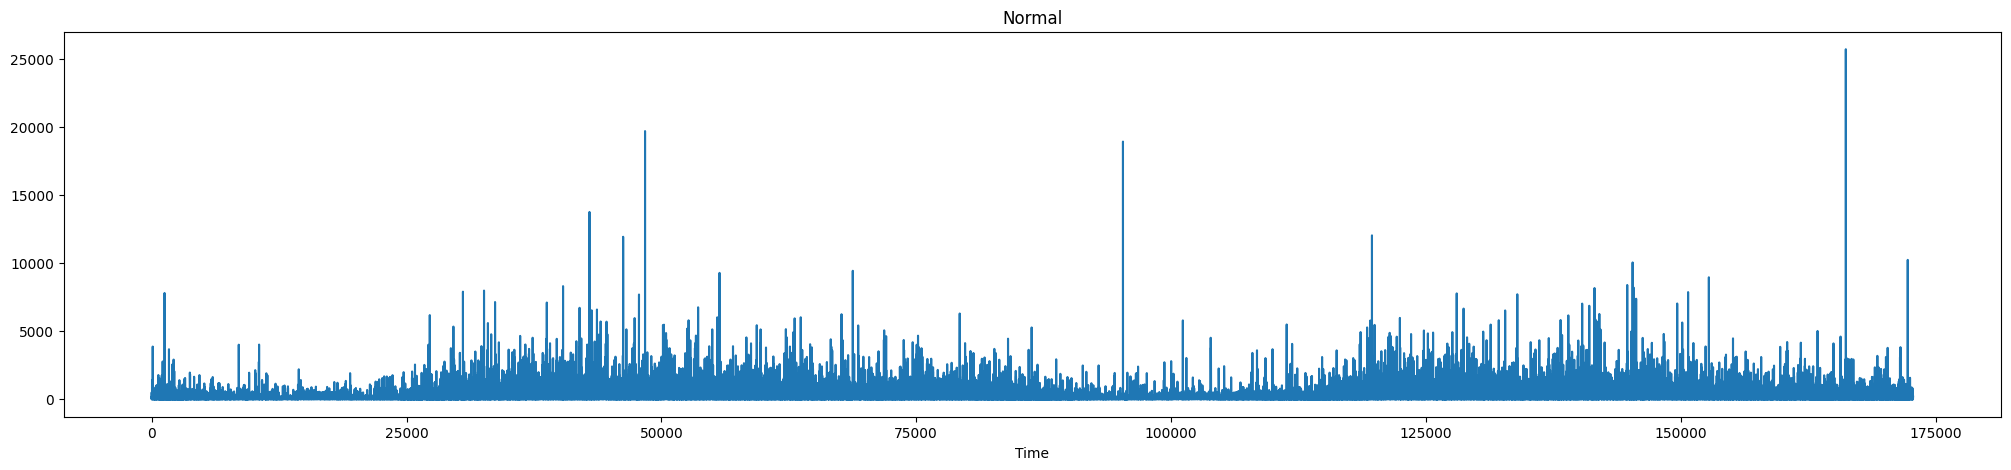

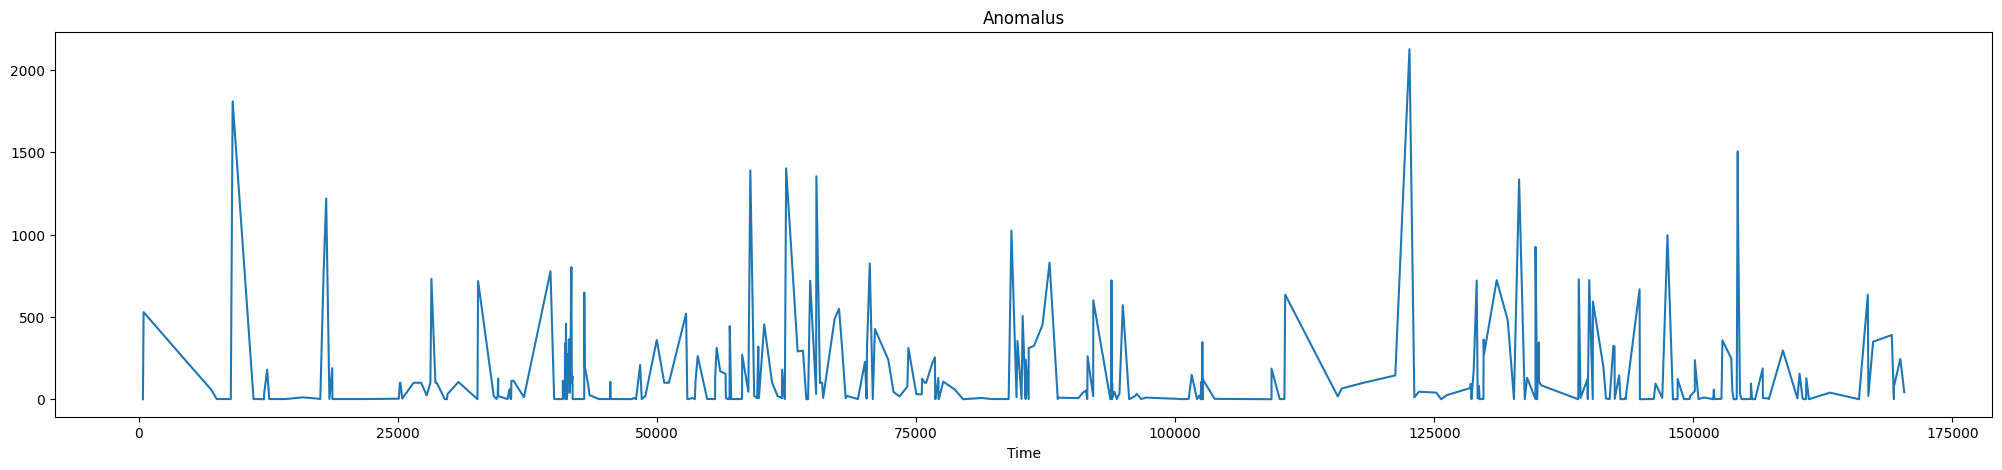

In [13]:
data.groupby("Time")["Amount"].sum().plot(figsize=(25,5))
plt.show()
data[~mask].groupby("Time")["Amount"].sum().plot(figsize=(25,5), title="Normal")
plt.show()
data[mask].groupby("Time")["Amount"].sum().plot(figsize=(25,5), title="Anomalus")
plt.show()

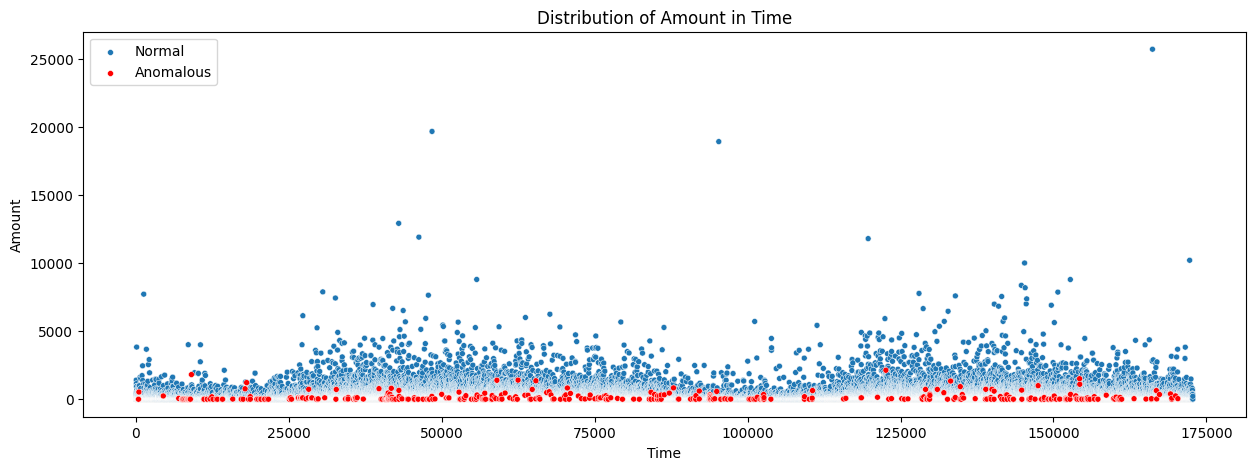

In [14]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data[~mask], x="Time", y="Amount", marker="o", size=0.5, legend=False)
sns.scatterplot(data=data[mask], x="Time", y="Amount", marker="o", size=1, color="red", legend=False)
plt.legend(
        # title='Smoker', 
        loc='upper left', labels=['Normal', 'Anomalous'])
# plt.legend(None)
plt.title("Distribution of Amount in Time")
plt.show()

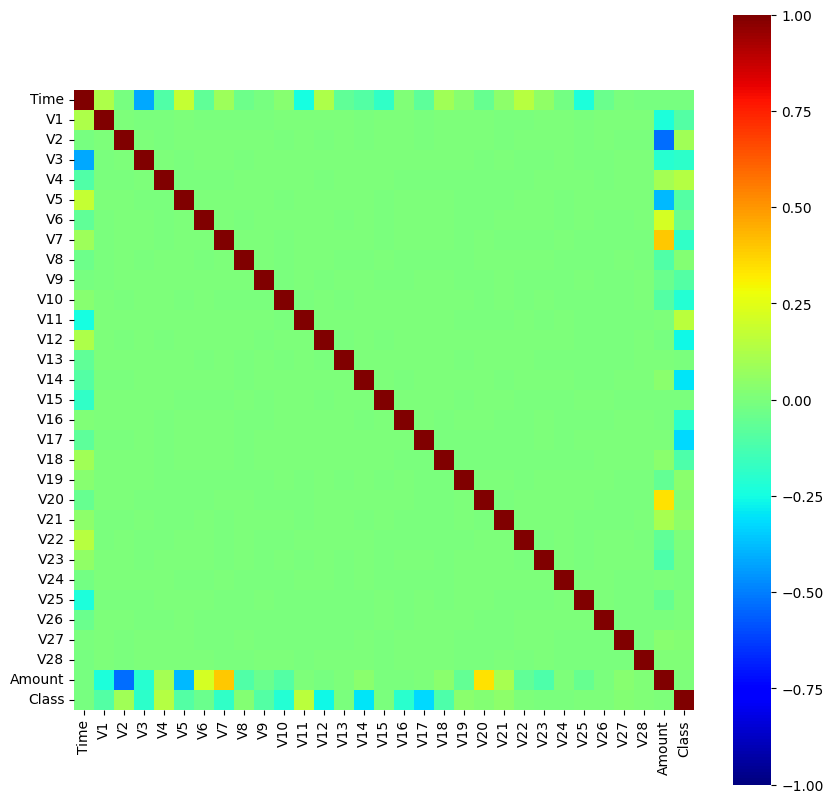

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="jet", square=True, vmin=-1, vmax=1)
plt.show()

#### scale data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
data1 = data.drop(["Time", target],axis=1)
_cols = data1.columns
data1 = MinMaxScaler((0,1)).fit_transform(data1)
data1 = pd.concat([pd.DataFrame(data1, columns=_cols), data[["Time", target]]], axis=1)
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,0.958294,0.033276,0.0,0.942658,0.958601,0.980645,1.0
V2,284807.0,0.767258,0.017424,0.0,0.760943,0.767949,0.775739,1.0
V3,284807.0,0.837414,0.026275,0.0,0.821985,0.840530,0.855213,1.0
V4,284807.0,0.251930,0.062764,0.0,0.214311,0.251050,0.284882,1.0
V5,284807.0,0.765716,0.009292,0.0,0.761060,0.765351,0.769836,1.0
V6,284807.0,0.263020,0.013395,0.0,0.255295,0.260263,0.267027,1.0
V7,284807.0,0.265356,0.007537,0.0,0.261980,0.265600,0.268831,1.0
V8,284807.0,0.785385,0.012812,0.0,0.783148,0.785625,0.788897,1.0
V9,284807.0,0.462780,0.037846,0.0,0.440626,0.461008,0.483350,1.0
V10,284807.0,0.508722,0.022528,0.0,0.497644,0.506800,0.518113,1.0


#### distributions

In [18]:
def make_plot_distribution(df, target):
    import matplotlib.gridspec as gridspec

    columns = df.drop(target, axis=1).columns
    
    grid = gridspec.GridSpec(6, 5)

    plt.figure(figsize=(20,20))

    for n, col in enumerate(df[columns]):
        ax = plt.subplot(grid[n])
        sns.distplot(df[df[target]==1][col], bins = 50, color='g')
        sns.distplot(df[df[target]==0][col], bins = 50, color='r') 
        ax.set_ylabel('Density')
        ax.set_title(str(col))
        ax.set_xlabel('')
    plt.tight_layout()
    plt.show()

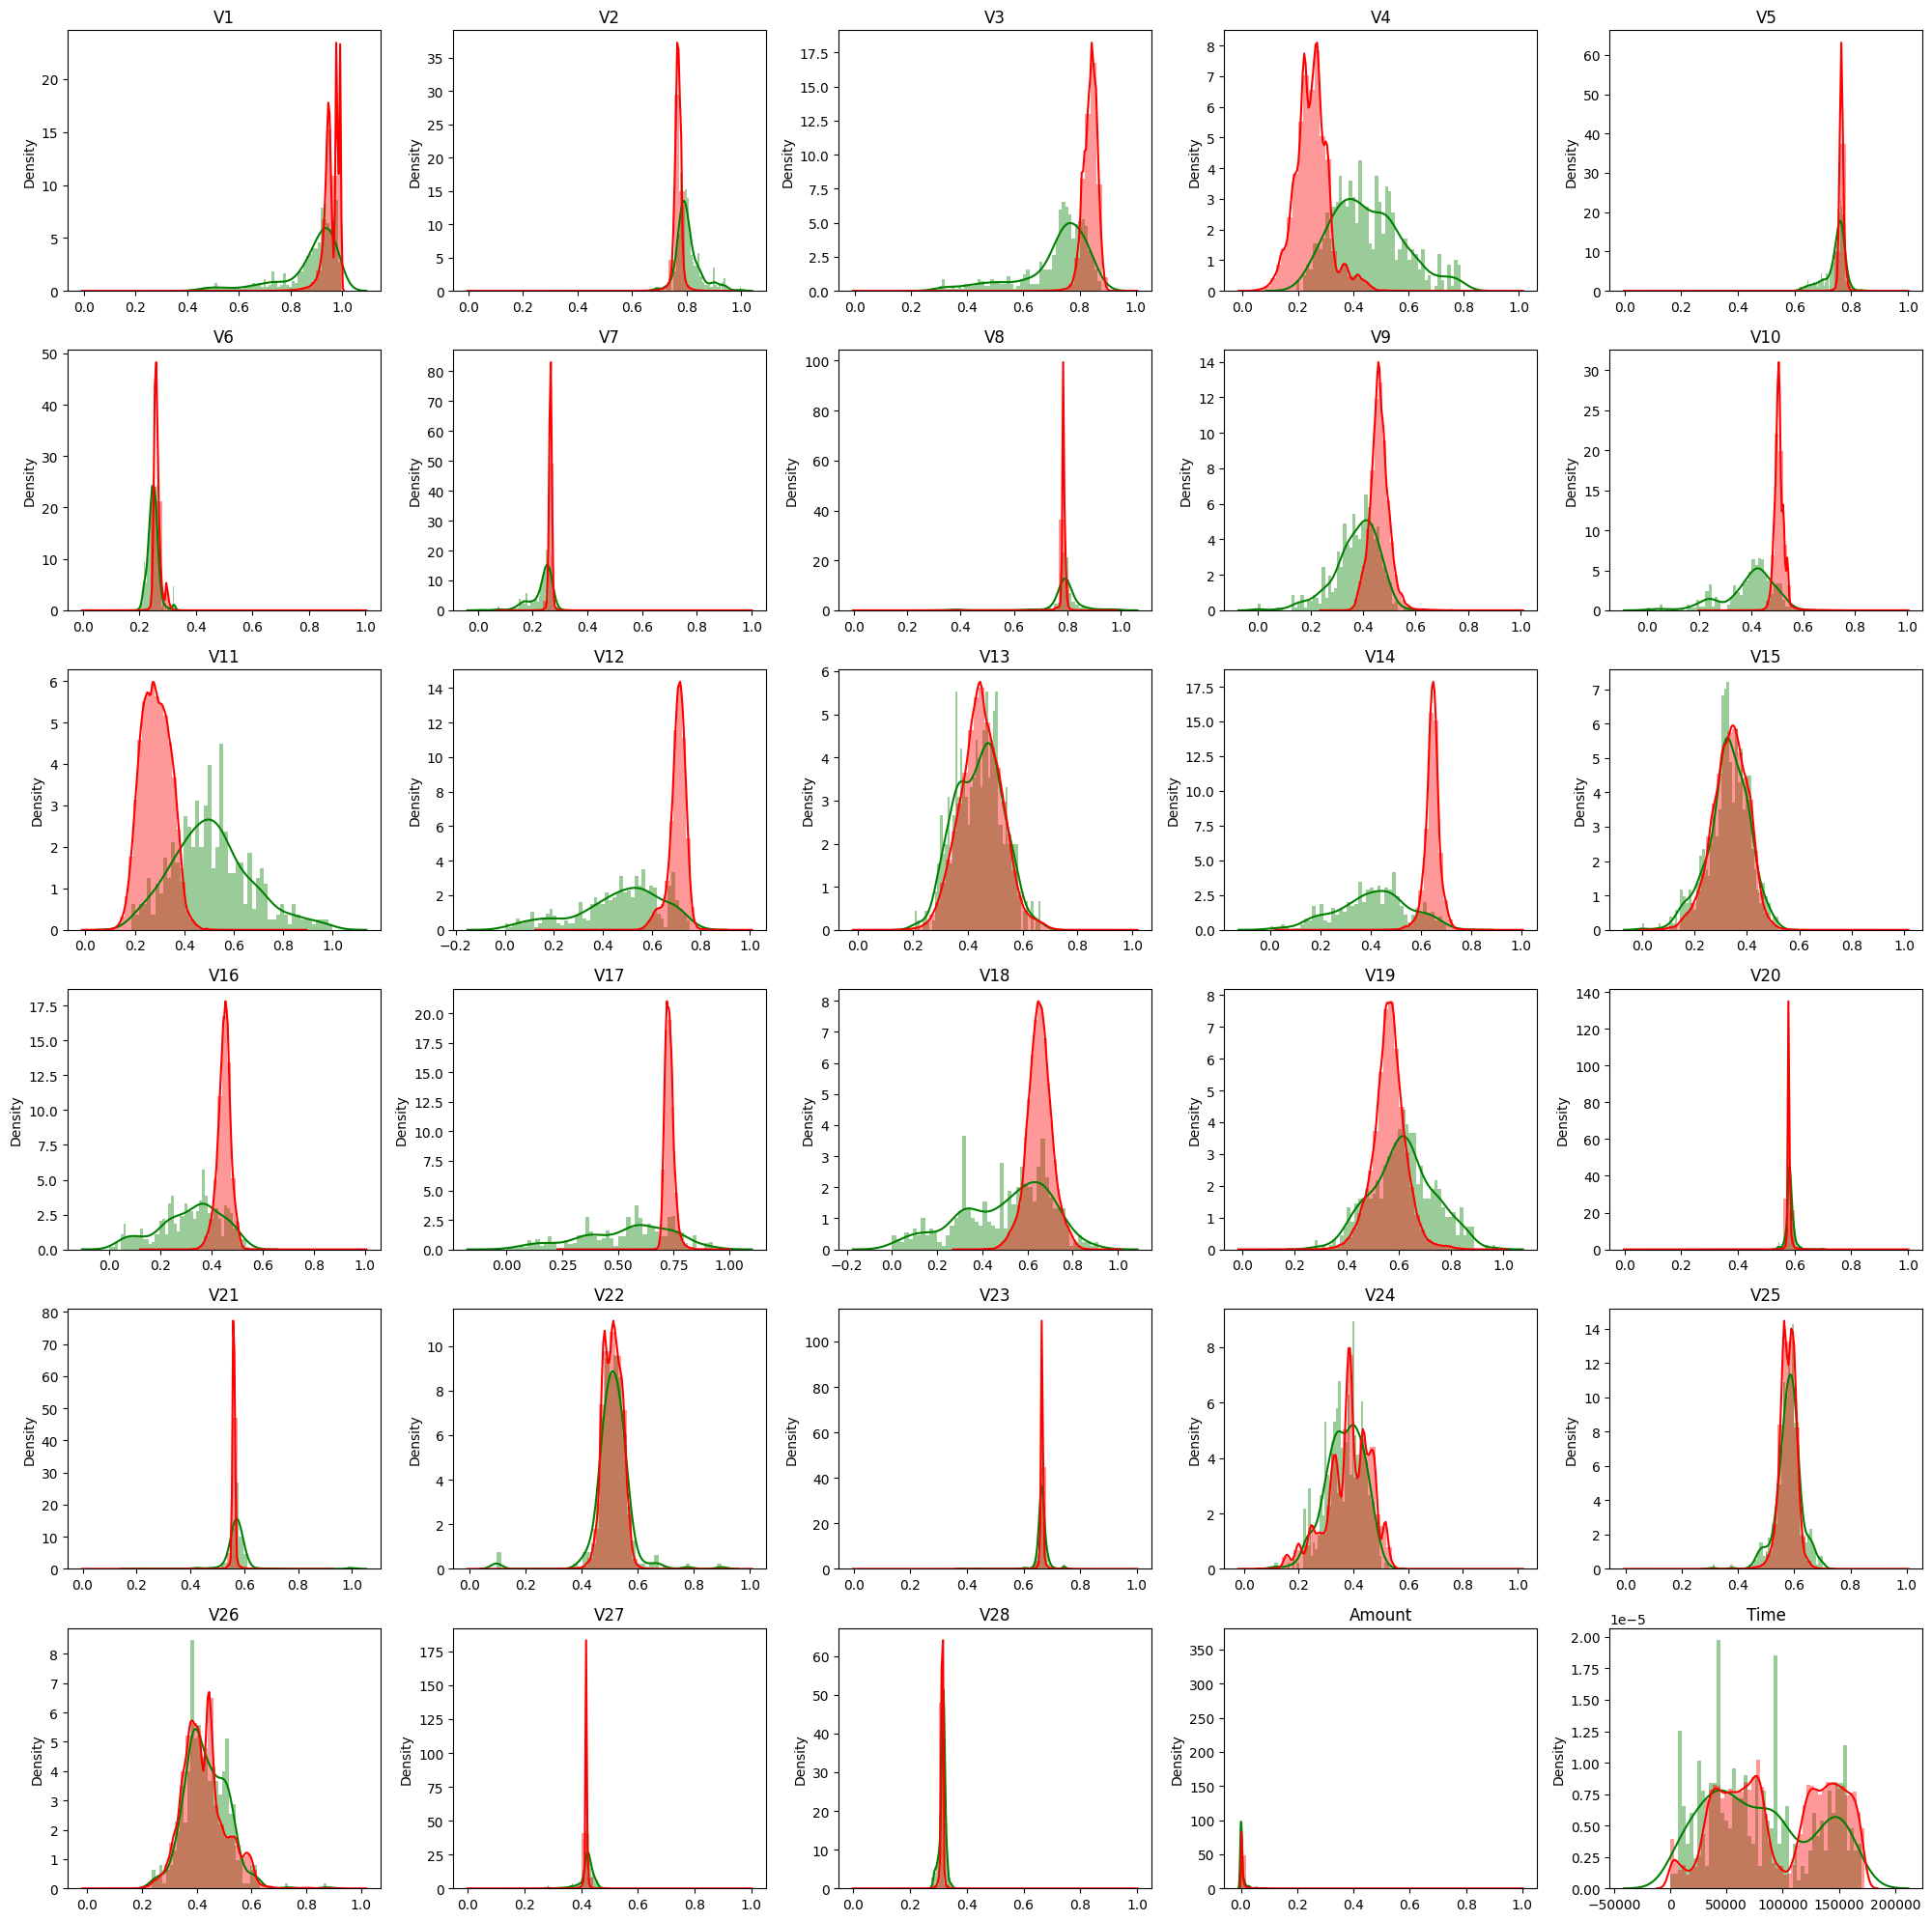

CPU times: total: 1min 41s
Wall time: 1min 52s


In [19]:
%%time
make_plot_distribution(df=data1, target=target)

### outliers

In [20]:
def make_plot_boxplot(df, target):
    import matplotlib.gridspec as gridspec

    columns = df.drop(target, axis=1).columns
    grid = gridspec.GridSpec(7, 10)

    plt.figure(figsize=(20,20))

    for n, col in enumerate(df[columns]):
        ax = plt.subplot(grid[n])
        sns.boxplot(data=data1, x=target, y=col)
        # ax.set_ylabel('Density')
        ax.set_title(str(col))
        ax.set_xlabel('')
        ax.set_ylabel('')
    plt.tight_layout()
    plt.show()

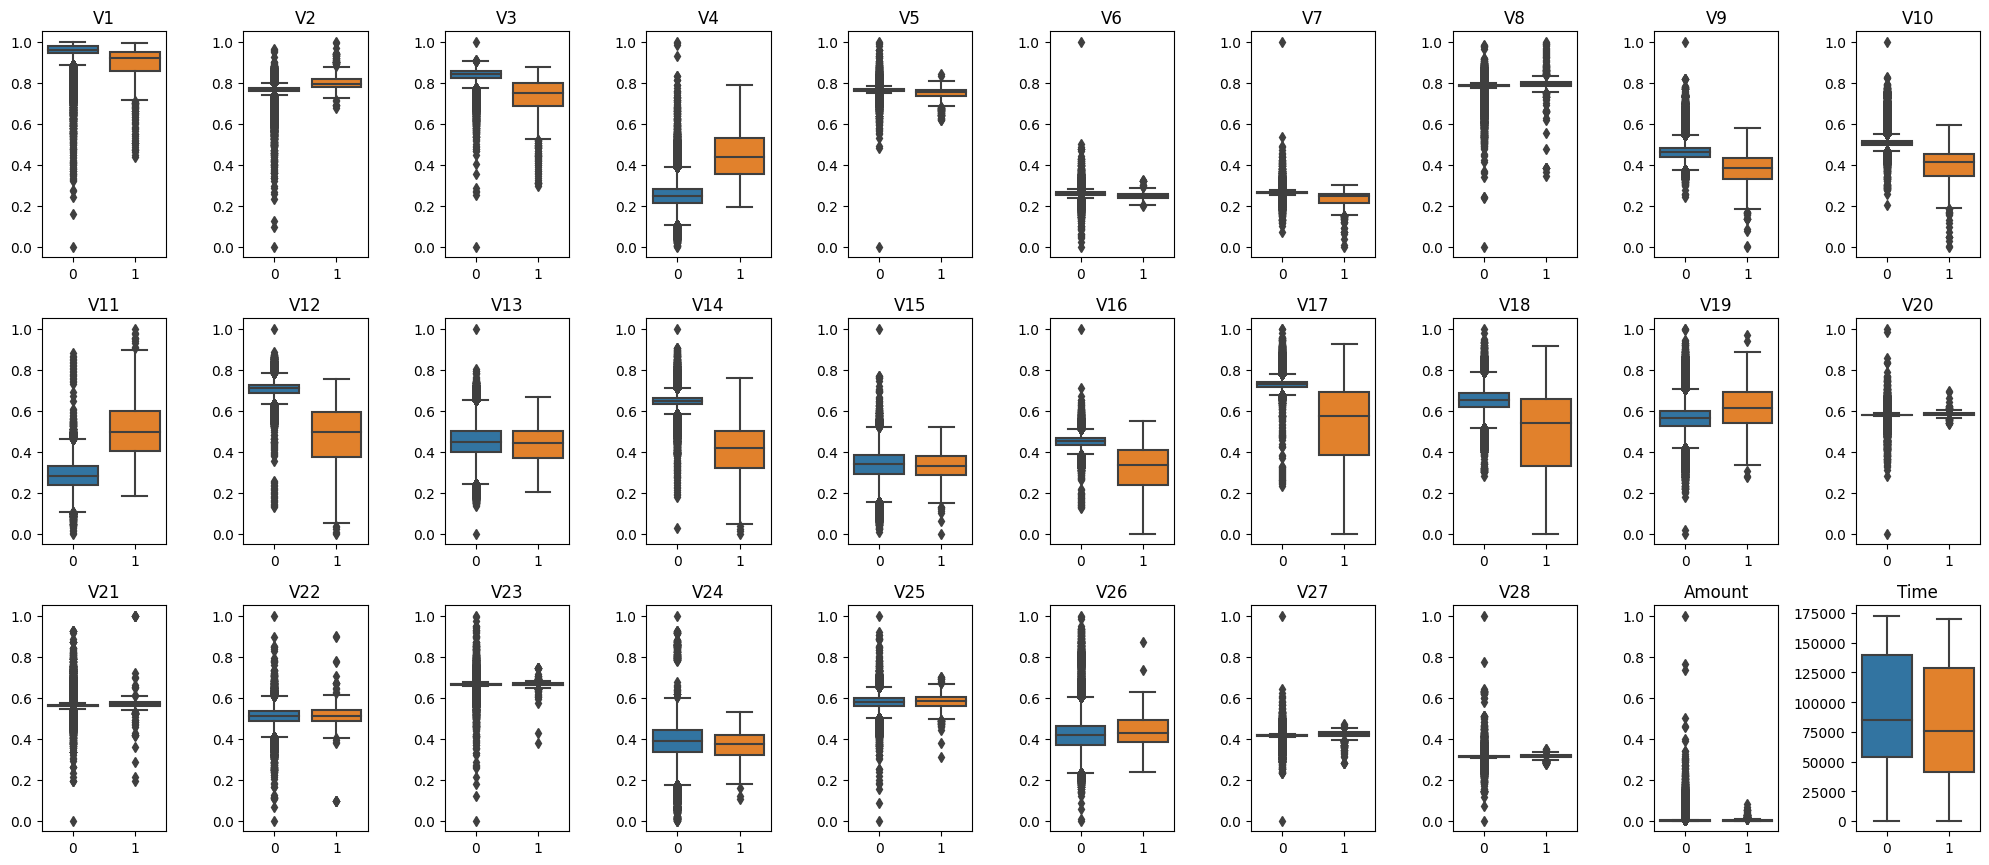

CPU times: total: 6.78 s
Wall time: 7.49 s


In [21]:
%%time
make_plot_boxplot(df=data1, target=target)

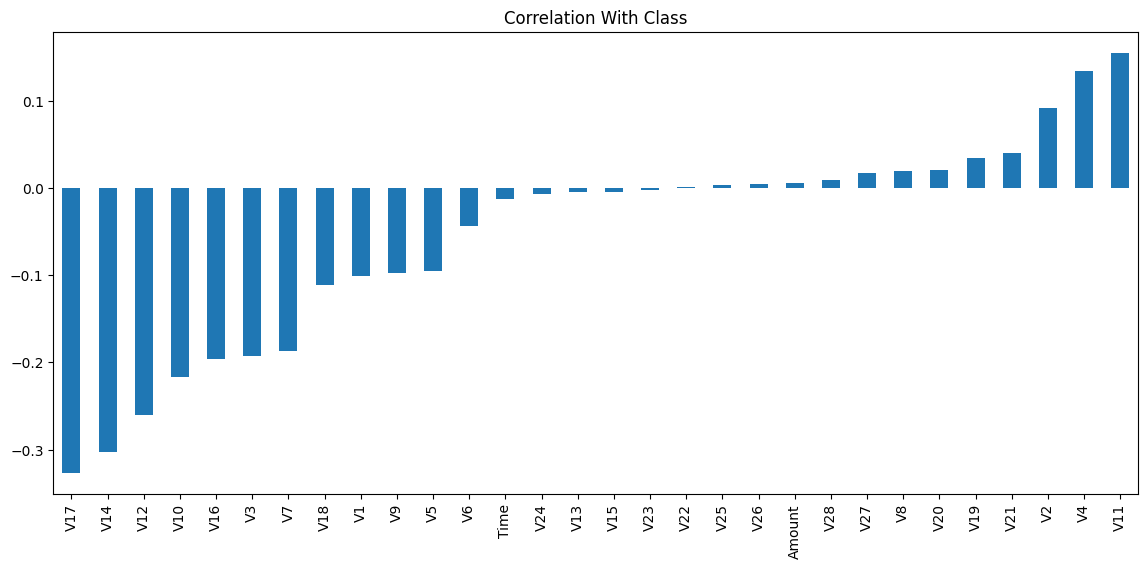

CPU times: total: 1.33 s
Wall time: 1.52 s


In [22]:
%%time
plt.figure(figsize = (14,6))
data1.corr()[target].drop(target).sort_values().plot(kind = 'bar')
plt.title(f'Correlation With {target}')
plt.show()

## Testing models with data

In [23]:
from sklearn.model_selection import train_test_split

### Split train test

In [24]:
X = data1[X_cols].values
y = data1[target].values
print(f"{X.shape=}, {y.shape=}")
X_train, X_test, y_train, y_test = train_test_split(
                                                        X, y
                                                        , test_size = 0.2
                                                        , random_state=123
                                                        , stratify=y        # La distribucion de y se mantiene en el split
                                                    )
print(f"X_train={X_train.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}")
# print("y\n",pd.concat([pd.DataFrame(y).value_counts(), pd.DataFrame(y).value_counts(normalize=True)*100],axis=1))
# print("\ny_train\n",pd.concat([pd.DataFrame(y_train).value_counts(), pd.DataFrame(y_train).value_counts(normalize=True)*100],axis=1))
# print("\ny_test\n",pd.concat([pd.DataFrame(y_test).value_counts(), pd.DataFrame(y_test).value_counts(normalize=True)*100],axis=1))

X.shape=(284807, 28), y.shape=(284807,)
X_train=(227845, 28), X_test=(56962, 28), y_train=(227845,), y_test=(56962,)


### Test classifiers

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [26]:
def run_model(model, X_train, y_train, X_test, y_test):

    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score, recall_score, precision_recall_curve, classification_report

    # print(m)
    try:
        clf = eval(f"{model}(random_state=123)")
    except:
        clf = eval(f'{model}()')
    clf.fit(X=X_train, y=y_train)
    y_pred = clf.predict(X_test)
    res = {
            "model": clf
            , "y_pred": y_pred
            , "accuracy_score": accuracy_score(y_test,y_pred)
            , "confusion_matrix": confusion_matrix(y_test,y_pred)
            , "precision": precision_score(y_test,y_pred)
            , "recall_score": recall_score(y_test,y_pred)
            , "f1_score": f1_score(y_test,y_pred)
            , "classification_report": classification_report(y_test,y_pred, output_dict=True)
        }
    return res

In [27]:
models = dict()
models_2_run = ['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','XGBClassifier']
for m in tqdm(models_2_run):
    models[m] = run_model(m, X_train, y_train, X_test, y_test)

100%|██████████| 4/4 [05:49<00:00, 87.39s/it] 


In [28]:
pd.DataFrame(models).T

,model,y_pred,accuracy_score,confusion_matrix,precision,recall_score,f1_score,classification_report
LogisticRegression,LogisticRegression(random_state=123),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.998982,"[[56856, 8], [50, 48]]",0.857143,0.489796,0.623377,"{'0': {'precision': 0.9991213580290303, 'recal..."
KNeighborsClassifier,KNeighborsClassifier(),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.999333,"[[56856, 8], [30, 68]]",0.894737,0.693878,0.781609,"{'0': {'precision': 0.9994726294694652, 'recal..."
RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.999333,"[[56857, 7], [31, 67]]",0.905405,0.683673,0.77907,"{'0': {'precision': 0.9994550696104627, 'recal..."
XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.999386,"[[56857, 7], [28, 70]]",0.909091,0.714286,0.8,"{'0': {'precision': 0.99950777885207, 'recall'..."


#### *RECALL* gives true classifier in each Class

https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/

- TP / (TP + FN)


In [29]:
print("check RECALL, those are the correct classified for Anomalous <Class=1>")
report = pd.concat([pd.DataFrame(v['classification_report']).T.assign(model=k) for k,v in models.items()]).reset_index()
report = report[['model']+list(report.columns)[:-1]].rename(columns={"index": "metric"})
report = report[report["metric"].isin(["1"])].drop("metric", axis=1).reset_index(drop=True)
report

check RECALL, those are the correct classified for Anomalous <Class=1>


,model,precision,recall,f1-score,support
0,LogisticRegression,0.857143,0.489796,0.623377,98.0
1,KNeighborsClassifier,0.894737,0.693878,0.781609,98.0
2,RandomForestClassifier,0.905405,0.683673,0.779070,98.0
3,XGBClassifier,0.909091,0.714286,0.800000,98.0
